In [2]:
import sys
sys.path.append('../')

In [62]:
!pip install ipywidgets matplotlib opencv-python
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import numpy as np
import IPython.display as display

from tf_3d_ops.resize import Resize3D
import medmnist
from test_utils import download_and_prepare_dataset
import tensorflow as tf
import io
import imageio
import ipywidgets


DATASET_NAME = "organmnist3d"
# Get the metadata of the dataset
info = medmnist.INFO[DATASET_NAME]

# Get the dataset
prepared_dataset = download_and_prepare_dataset(info)
(train_videos, train_labels) = prepared_dataset[0]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01


In [13]:
image_np = train_videos[0]

In [6]:
image = tf.expand_dims(image_np, 0)
image = tf.expand_dims(image, -1)

2023-02-11 13:25:54.441507: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-11 13:25:54.442183: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-11 13:25:54.442297: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anas-ai): /proc/driver/nvidia/version does not exist
2023-02-11 13:25:54.448590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
print(image.shape)

(1, 28, 28, 28, 1)


In [8]:
resize_layer = Resize3D((56, 56, 56))

In [75]:
image_resized = resize_layer(image)

/home/manasraza/tensorflow-3d-ops/tests/../tf_3d_ops/resize.py:15: UserWarning: Resize3D not tested on real world data yet.
  warnings.warn(f"Resize3D not tested on real world data yet.")


In [76]:
image_resized = tf.squeeze(image_resized)

In [77]:
image_resized.shape

TensorShape([56, 56, 56])

In [52]:
image_np = np.expand_dims(image_np, -1)

In [78]:
image_resized_np = np.expand_dims(image_resized.numpy(), -1)

In [54]:
image_np.shape

(28, 28, 28, 1)

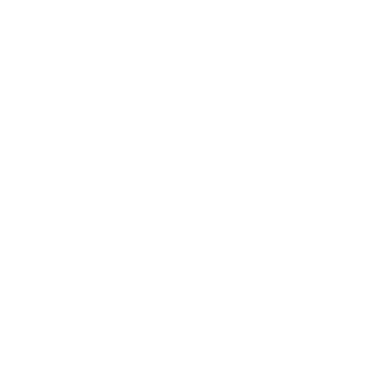

In [83]:
frames = [] # for storing the generated images
fig = plt.figure()
plt.axis('off')
for img in image_np:
    
    frames.append([plt.imshow(img, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=100, #blit=True,
                                repeat_delay=50)
# plt.axis
ani.save('./samples/3d_image_organmnist3d_original.gif', writer='imagemagick', fps=5)
# plt.show()

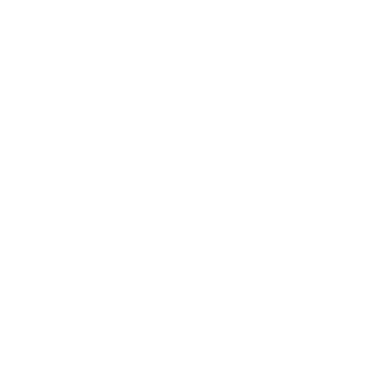

In [84]:
frames = [] # for storing the generated images
fig = plt.figure()
plt.axis('off')

for img in image_resized_np:
    
    frames.append([plt.imshow(img, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=100, #blit=True,
                                repeat_delay=50)
ani.save('./samples/3d_image_organmnist3d_resized.gif', writer='imagemagick', fps=5)
# plt.show() 